####Devemos gerar um relatório de como estão as vendas em cada cidade, sendo elas: Aracaju, Fortaleza, Natal, Recife e Salvador.


In [1]:
#Importando a biblioteca
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [3]:
#Note que todos os dataframes possuem a mesma estrutura
#Juntando todos os arquivos

df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
#Exibindo as 5 primeiras linhas

df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#Exibindo as 5 últimas linhas

df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
#Exibindo uma amostra do nosso df

df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
38,Natal,2018-02-25,828.00,852,4
98,Aracaju,2018-01-01,138.33,1521,10
36,Salvador,2019-01-01,9.67,1037,1
30,Aracaju,2018-01-01,119.21,1520,8
114,Salvador,2019-03-02,25.52,1034,1


In [7]:
#Verificando o tipo de dado de cada coluna 

df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
#Alterando o tipo da coluna LojaID(opcional no nosso caso)

df['LojaID'] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [9]:
#Consultando linhas com valores faltantes

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
##Caso houvesse valores nulos, poderiamos executar as seguintes opções:

#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

#Apagando as linhas com valores nulos 
df.dropna(inplace=True)

#Apagando as linhas com valores nulos com base apenas em 1 coluna específica
df.dropna(subset=['Vendas'], inplace=True)

#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)


**Criando colunas novas**

In [11]:
#Criando a coluna de receita

df['Receita'] = df['Vendas']*df['Qtde']
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [12]:
#Retornando a maior receita

df['Receita'].max()

3544.0

In [13]:
# Retornando a menor receita

df['Receita'].min()

3.34

In [14]:
#Quais as 3 lojas que mais venderam?

df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [15]:
#Quais as 3 lojas que menos venderam?

df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [16]:
#Agrupamento por cidade

df.groupby('Cidade')['Receita'].sum().sort_values(ascending=False)


Cidade
Natal        167227.52
Recife        51936.51
Aracaju       48748.25
Salvador      40596.73
Fortaleza     37913.97
Name: Receita, dtype: float64

**Trabalhando com datas**

In [17]:
##Geralmente nos dataframes o formato da coluna data nunca está de fato no tipo correto de data, 
##vamos então alterar o tipo da coluna data para inteiro, para assim nos familiarizarmos com o método de mudança

#Transformando a coluna de data em tipo inteiro

df['Data'] = df['Data'].astype('int64')
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [18]:
#Transformando coluna de data em data

df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [19]:
#Qual a receita por ano, ou seja, ao passar dos anos, a receita está aumentando ou diminuindo?

df.groupby(df['Data'].dt.year)['Receita'].sum()


Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [20]:
#Criando uma nova coluna com o ano

df['Ano_Venda'] = df['Data'].dt.year

In [21]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
84,Fortaleza,2019-01-01,147.46,1003,6,884.76,2019
16,Recife,2019-01-01,19.95,980,8,159.60,2019
77,Salvador,2019-01-01,218.76,1037,1,218.76,2019
223,Natal,2019-01-02,40.51,1037,2,81.02,2019
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,2018


In [22]:
#Extraindo o mês e o dia da venda

df['Mês_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda
120,Aracaju,2018-01-01,7.73,1520,10,77.30,2018,1,1
28,Salvador,2019-01-01,162.34,1035,2,324.68,2019,1,1
192,Natal,2019-01-02,166.51,1036,1,166.51,2019,1,2
119,Aracaju,2018-01-01,9.32,1523,6,55.92,2018,1,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,3,2


In [23]:
#Retornando a data mais antiga

df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [24]:
#Retornando a diferença de dias

df['Diferença_Dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias
93,Salvador,2019-01-01,15.58,1037,1,15.58,2019,1,1,365 days
118,Recife,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days
29,Aracaju,2018-01-01,44.04,1520,6,264.24,2018,1,1,0 days
237,Natal,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days


In [25]:
#Criando a coluna trimestre

df['Trimestre_Vendas'] = df['Data'].dt.quarter
df.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias,Trimestre_Vendas
223,Natal,2019-01-02,40.51,1037,2,81.02,2019,1,2,366 days,1
70,Natal,2019-02-14,743.00,854,4,2972.00,2019,2,14,409 days,1
50,Natal,2019-03-08,324.00,854,4,1296.00,2019,3,8,431 days,1
15,Aracaju,2018-01-01,153.28,1523,6,919.68,2018,1,1,0 days,1
73,Natal,2018-01-05,773.00,852,2,1546.00,2018,1,5,4 days,1


In [26]:
#Filtrando as vendas de 2019 do mês de março

vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

vendas_marco_2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mês_Venda,Dia_Venda,Diferença_Dias,Trimestre_Vendas
121,Salvador,2019-03-02,100.70,1037,3,302.10,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2019,3,30,453 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1


**Visualização de dados**

In [27]:
#Quantas vendas cada loja realizou?

df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

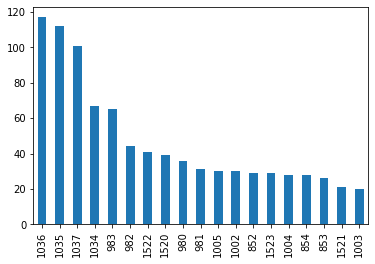

In [28]:
#Vamos visualizar essa informação em um gráfico de barras

df['LojaID'].value_counts(ascending=False).plot.bar()

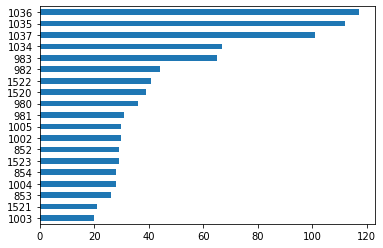

In [29]:
#Gráfico de barras horizontais

df['LojaID'].value_counts(ascending=True).plot.barh();


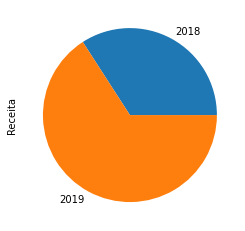

In [30]:
#Gráfico de Pizza

df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [31]:
#Total de vendas por cidade

df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

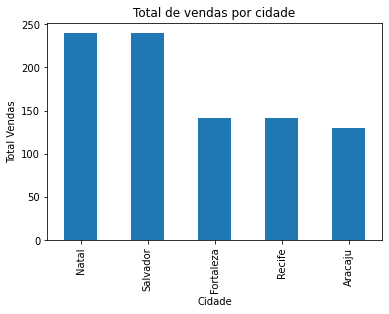

In [32]:
#Adicionando um título e alterando o nome dos eixos

import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

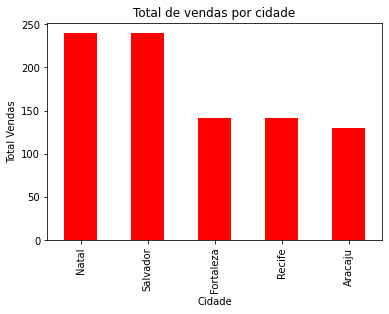

In [33]:
#Alterando a cor do gráfico

df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

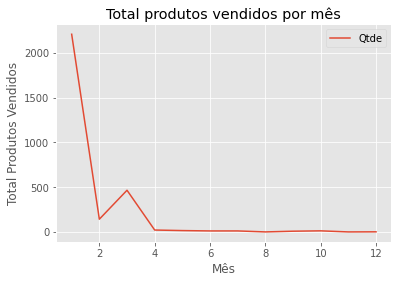

In [41]:
##Quantidade de produtos vendidos por mês

#Alterando o estilo do gráfico

plt.style.use('ggplot')

df.groupby(df['Mês_Venda'])['Qtde'].sum().plot(title='Total produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [42]:
df.groupby(df['Mês_Venda'])['Qtde'].sum()

Mês_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

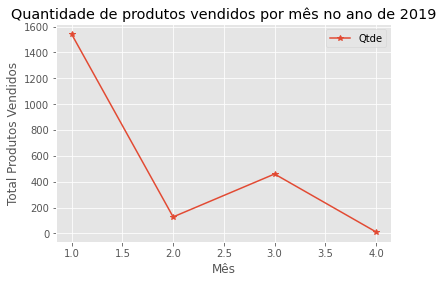

In [52]:
#Selecionando apenas as vendas de 2019

df_2019 = df[df['Ano_Venda'] == 2019]

#Total produtos vendidos por mês no ano de 2019

df_2019.groupby(df_2019['Mês_Venda'])['Qtde'].sum().plot(title='Quantidade de produtos vendidos por mês no ano de 2019', marker = '*')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

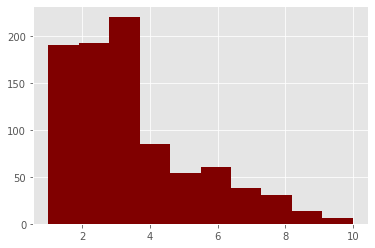

In [55]:
#Plotar um histograma com a quantidade de produtos vendidos

plt.hist(df['Qtde'], color='maroon');

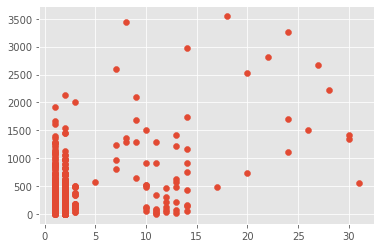

In [58]:
#Plotando um gráfico de disperção

plt.scatter(x = df_2019['Dia_Venda'], y = df_2019['Receita']);



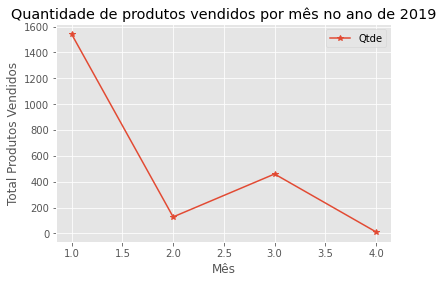

In [59]:
#Como salvar um gráfico em png

df_2019.groupby(df_2019['Mês_Venda'])['Qtde'].sum().plot(title='Quantidade de produtos vendidos por mês no ano de 2019', marker = '*')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('Grafico Qtde e Mes.png')

##OBSERVAÇÃO O GRAFICO FICA NOS ARQUIVOS PRONTO PARA DOWNLOAD